In [1]:
#Load Libraries

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install pandas

Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
import pandas as pd

In [5]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt

In [7]:
#Import Data

In [8]:
Cars_Data=pd.read_csv('C:\\Users\\Andrew\\Anaconda3\\WD\\Cars.csv')

In [9]:
Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [10]:
#Data Exploration

In [11]:
###msrp

In [12]:
Cars_Data['msrp'].mean()

32774.85514018692

In [13]:
Cars_Data['msrp'].max()

192465

In [14]:
Cars_Data['msrp'].min()

10280

In [15]:
Cars_Data['msrp'].std()

19431.71667371752

In [16]:
Cars_Data['msrp'].count()

428

In [17]:
###msrp by car type

In [18]:
Cars_Data.groupby('sports_car')['msrp'].mean()

sports_car
False    30109.952507
True     53387.061224
Name: msrp, dtype: float64

In [19]:
Cars_Data.groupby('suv')['msrp'].mean()

suv
False    32446.258152
True     34790.250000
Name: msrp, dtype: float64

In [20]:
Cars_Data.groupby('wagon')['msrp'].mean()

wagon
False    33071.412060
True     28840.533333
Name: msrp, dtype: float64

In [21]:
Cars_Data.groupby('minivan')['msrp'].mean()

minivan
False    33018.892157
True     27796.500000
Name: msrp, dtype: float64

In [22]:
Cars_Data.groupby('pickup')['msrp'].mean()

pickup
False    33240.210396
True     24941.375000
Name: msrp, dtype: float64

In [23]:
Cars_Data.groupby('all_wheel')['msrp'].mean()

all_wheel
False    31759.395833
True     36483.489130
Name: msrp, dtype: float64

In [24]:
Cars_Data.groupby('rear_wheel')['msrp'].mean()

rear_wheel
False    28167.732704
True     46093.627273
Name: msrp, dtype: float64

In [25]:
###correlation with msrp

In [26]:
Cars_Data['dealer_cost'].corr(Cars_Data['msrp'])

0.9991316206272137

In [27]:
Cars_Data['eng_size'].corr(Cars_Data['msrp'])

0.5717529618466337

In [28]:
Cars_Data['ncyl'].corr(Cars_Data['msrp'])

0.62875728749234

In [29]:
Cars_Data['horsepwr'].corr(Cars_Data['msrp'])

0.8269450085627251

In [30]:
Cars_Data['city_mpg'].corr(Cars_Data['msrp'])

-0.46112963133335716

In [31]:
Cars_Data['hwy_mpg'].corr(Cars_Data['msrp'])

-0.42939568337608813

In [32]:
Cars_Data['weight'].corr(Cars_Data['msrp'])

0.4493356676870791

In [33]:
###sport cars correlation

In [34]:
Sport_Cars_Data=Cars_Data[Cars_Data['sports_car'] == True]

In [35]:
Sport_Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
245,Acura NSX coupe 2dr manual S,True,False,False,False,False,False,True,89765,79978,3.2,6,290,17.0,24.0,3153.0,100.0,174.0,71.0
246,Audi RS 6 4dr,True,False,False,False,False,False,False,84600,76417,4.2,8,450,15.0,22.0,4024.0,109.0,191.0,78.0
247,Audi TT 1.8 convertible 2dr (coupe),True,False,False,False,False,False,False,35940,32512,1.8,4,180,20.0,28.0,3131.0,95.0,159.0,73.0
248,Audi TT 1.8 Quattro 2dr (convertible),True,False,False,False,False,True,False,37390,33891,1.8,4,225,20.0,28.0,2921.0,96.0,159.0,73.0
249,Audi TT 3.2 coupe 2dr (convertible),True,False,False,False,False,True,False,40590,36739,3.2,6,250,21.0,29.0,3351.0,96.0,159.0,73.0


In [36]:
Sport_Cars_Data['hwy_mpg'].corr(Sport_Cars_Data['msrp'])

-0.5900002460591512

In [37]:
Sport_Cars_Data['city_mpg'].corr(Sport_Cars_Data['msrp'])

-0.6308136860812209

In [38]:
###non-sport cars correlation

In [39]:
NotSport_Cars_Data=Cars_Data[Cars_Data['sports_car'] == False]

In [40]:
NotSport_Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [41]:
NotSport_Cars_Data['hwy_mpg'].corr(NotSport_Cars_Data['msrp'])

-0.49257087155792

In [42]:
NotSport_Cars_Data['city_mpg'].corr(NotSport_Cars_Data['msrp'])

-0.5174295818936742

In [43]:
###Looks like there is stronger negative correlation for sport cars' msrp and hwy_mpg/city_mpgp versus non-sport cars

In [44]:
Cars_Data['wheel_base'].corr(Cars_Data['msrp'])

0.15035398259821192

In [45]:
Cars_Data['length'].corr(Cars_Data['msrp'])

0.214888960437098

In [46]:
Cars_Data['width'].corr(Cars_Data['msrp'])

0.3281128904585705

In [47]:
###histogram by variable

<AxesSubplot:title={'center':'MSRP'}, xlabel='Dollars', ylabel='Frequency'>

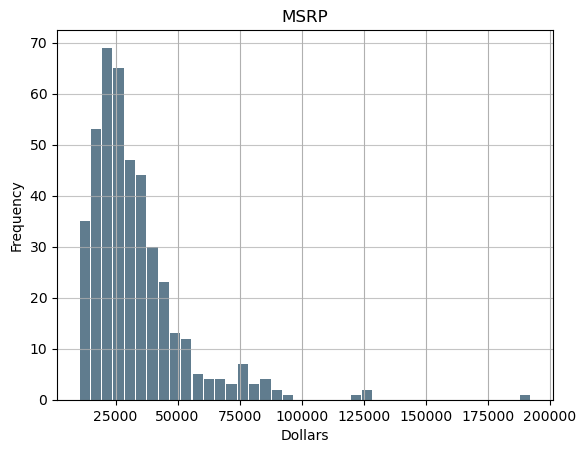

In [48]:
plt.title('MSRP')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['msrp'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<AxesSubplot:title={'center':'Dealer Cost'}, xlabel='Dollars', ylabel='Frequency'>

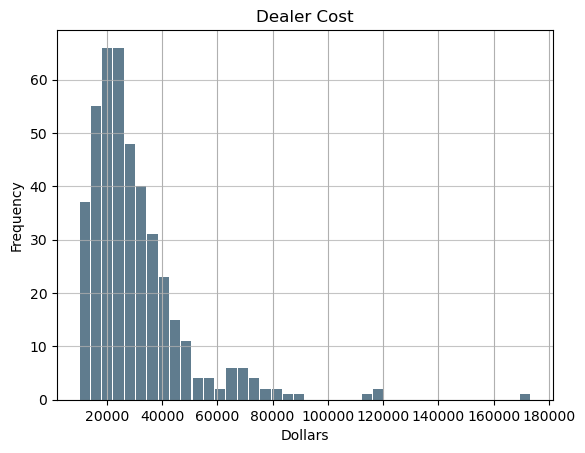

In [49]:
plt.title('Dealer Cost')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['dealer_cost'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<AxesSubplot:title={'center':'Engine Size'}, xlabel='Liters', ylabel='Frequency'>

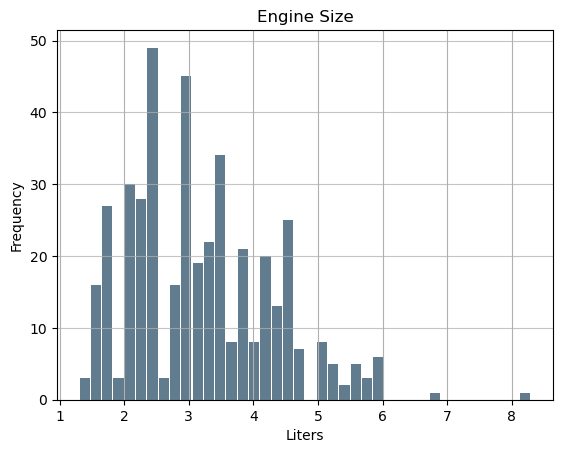

In [50]:
plt.title('Engine Size')
plt.xlabel('Liters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['eng_size'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

In [57]:
un_cylinders=[Cars_Data['ncyl'].unique()]

In [62]:
un_cylinders

[array([ 4,  6,  3,  8,  5, 12, 10, -1], dtype=int64)]